# Машинное обучение, DS-поток
## Задание ML.5


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 10 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 90 баллов.

In [ ]:
# Bot check

# HW_ID: ds_ml5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [70]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils import shuffle
sns.set(font_scale=1.3, palette='Set2')

---
## Теория

Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ &mdash; некоторый классификатор, предсказывающий <u><i>степень принадлежности</i></u> классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
В задачах 1-4 рассматриваем логистическую функцию потерь:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big).$$

### Задача 1

Покажите, что задача минимизации по функциям $y(x)$ функционала ошибки $$Q(y) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, y(x_i)\right) \longrightarrow \min_{y(x)}$$ для логистической функции потерь эквивалентна максимизации по $y(x)$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(y(x_i)))$, где $Y_i \in \{-1, +1 \}$.

Запишем функцию правдоподобия:

$$
L_Y(y)=\prod_{i=1}^n \sigma(y(x_i))^\frac{1+Y_i}{2}\cdot (1-\sigma(y(x_i)))^\frac{1-Y_i}{2}\Rightarrow l_Y(y)=\sum_{i=1}^n \left[\frac{1+Y_i}{2}\log(\sigma(y(x_i)))+\frac{1-Y_i}{2}\log(1-\sigma(y(x_i)))\right]
$$

Теперь запишем логистическую функцию:

$$
\sigma(t)=\frac{1}{1+\exp(-t)}\Rightarrow \log(\sigma(y(x_i)))=-\log(1+\exp(-y(x_i))), \log(1-\sigma(y(x_i)))=-y(x_i)-\log(1+\exp(-y(x_i)))
$$

Теперь можем переписать логарифм функции правдоподобия:

$$
l_Y(y)=-\sum_{i=1}^n \left[\log(1+\exp(-y(x_i)))+\frac{1-Y_i}{2}y(x_i)\right]=-\sum_{i=1}^n \left[\log(1+\exp(-y(x_i)))+\log\left(\exp\left(\frac{1-Y_i}{2}y(x_i)\right)\right)\right]=
$$

$$
=-\sum_{i=1}^n \log \left(\exp\left[\frac{1-Y_i}{2}y(x_i)\right]+\exp\left[-\frac{1+Y_i}{2}y(x_i)\right]\right)
$$

Далее рассмотрим суммы только для $Y_i=1$ и для $Y_i=-1$:

$$
l_Y^\pm (y)=-\sum_{i=1}^n \mathbb{I}\{Y_i=\pm 1\} \log\left(1+\exp\left[\mp y(x_i)\right]\right)
$$

Выражение под логарифмом получается из соображений:

$$
\frac{1-1}{2}=0\qquad -\frac{1+1}{2}=-1\qquad \frac{1-(-1)}{2}=1\qquad -\frac{1+(-1)}{2}=0
$$

То же самое для функционала ошибки:

$$
Q^\pm (y)=\sum_{i=1}^n \{Y_i=\pm 1\} \log\left(1+\exp\left[\mp y(x_i)\right]\right)=-l_Y^\pm (y)
$$

Теперь, учитывая, что $l_Y=l_Y^++l_Y^-$, $Q=Q^++Q^-$, получим $Q(y)=-l_Y(y)$, откуда и следует, что минимизация $Q(y)$ равносильна максимизации $l_Y(y)$.

### Задача 2

Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов предсказаний и задачу поиска новой базовой модели по их приближению. 

Вектор сдвигов предсказаний:

$$
\tilde{g}^t=\nabla_s Q(Y, s)=\left(\frac{\partial \mathcal{L}}{\partial s_i}\right)_{i=1}^n
$$

$$
\frac{\partial \mathcal{L}}{\partial s_i}=\frac{\partial}{\partial s_i}\log(1+\exp(-Y_i s_i))=-\frac{Y_i\exp(-Y_is_i)}{1+\exp(-Y_i s_i)}
$$

Имеем задачу поиска:

$$
b_t(x_i)=\argmin_{b\in\mathcal{F}}\sum_{i=1}^n \left(b(x_i)-\frac{Y_i\exp(-Y_ib(x_i))}{1+\exp(-Y_ib(x_i))}\right)^2
$$

### Задача 3

Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку при построении новой базовой модели $b_t$?
2. Посмотрите на формулу для вектора сдвигов, полученную в предыдущей задаче. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов при построении новой базовой модели $b_t$?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь? Как она ведет себя на объектах с сильно отрицательным, околонулевым, сильно положительным отсупами?

1. 
$$
Q(\hat{y}_t)=\sum_{i=1}^n \log\left(1+\exp\left[-Y_i \hat{y}_t(x_i)\right]\right)
$$

2. Вклады объектов в формирование вектора различны, зависимость выражается $1-\sigma(Y_ib(x_i))$.

3. При $Y_i\hat{y_t}(x_i)<<0$ ошибка возрастает линейно (вклад большой, но много меньше случая экспоненциальной функции), при $Y_i\hat{y_t}(x_i)>>0$ ошибка примерно равна 0 (вклад малый). При околонулевых отступах ошибка аппроксимируется многочленом $\ln 2-\frac{Y_i\hat{y_t}(x_i)}{2}+\frac{1}{8}\left(Y_i\hat{y_t}(x_i)\right)^2$

### Задача 4

Рассмотрим градиентный бустинг над решающими деревьями с логистической функции потерь. После построения дерева будем делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ &mdash; новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.


Оптимизационная задача:

$$
\gamma_{tj}=\argmin_\gamma\sum_{x_i\in R_j} \log(1+\exp[-Y_i(\hat{y}(x_i)+\gamma)])
$$

Сделаем шаг метода Ньютона:

$$
\frac{\partial F_j^t}{\partial \gamma}=-\sum_{x_i\in R_j}\frac{Y_i \exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]}{1+\exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]}\qquad \frac{\partial^2 F_j^t}{\partial \gamma^2}=\sum_{x_i\in R_j}\frac{Y_i^2\exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]}{2\exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]+\exp[-2Y_i(\hat{y}_{t-1}(x_i)+\gamma)]+1}
$$

$$
\gamma_{tj} = \frac{\sum_{x_i\in R_j}\frac{Y_i \exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]}{1+\exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]}}{\sum_{x_i\in R_j}\frac{Y_i^2\exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]}{2\exp[-Y_i(\hat{y}_{t-1}(x_i)+\gamma)]+\exp[-2Y_i(\hat{y}_{t-1}(x_i)+\gamma)]+1}}
$$

---
## Практика

### Задача 5

**Внимание!** 

Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

**Не забывайте делать выводы в каждом пункте!**

#### 1.

Повторите исследование, проведенное в задаче 2 задания ML.4, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. 

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 1 до 15];
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

*Замечания.*
* В качестве основы можно использовать как свое решение задания ML.4, так и выложенное на [сайте](https://thetahat.ru). В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество итераций на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.

In [4]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17
)

In [5]:
def plot_dependence_test(param_grid, test_values, param_label,
                         metrics_label, title):
    '''
    Функция для построения графиков зависимости целевой метрики 
    от некоторого параметра модели на валидационной выборке.
    
    Параметры.
    1) param_grid — значения исследуемого параметра,
    2) test_values — значения метрики на валидационной выборке,
    3) param_label — названия параметра,
    4) metrics_label — название метрики,
    5) title — заголовок для графика.
    '''
    
    plt.figure(figsize=(12, 6))
    plt.plot(param_grid, test_values, label='test', linewidth=3)
   
    plt.xlabel(param_label)
    plt.ylabel(metrics_label)
    plt.legend()
    plt.title(title)
    plt.show()

In [9]:
boost = GradientBoostingRegressor(random_state=42)
forest = RandomForestRegressor(random_state=42)

In [10]:
# исследуем максимальную глубину
mse_values_boost = []
mse_values_forest = []
depth_grid = np.arange(1, 16)
for depth in depth_grid:
    boost.set_params(max_depth=depth)
    forest.set_params(max_depth=depth)
    boost.fit(X_train, y_train)
    forest.fit(X_train, y_train)
    mse_values_boost.append(mse(y_test, boost.predict(X_test)))
    mse_values_forest.append(mse(y_test, forest.predict(X_test)))

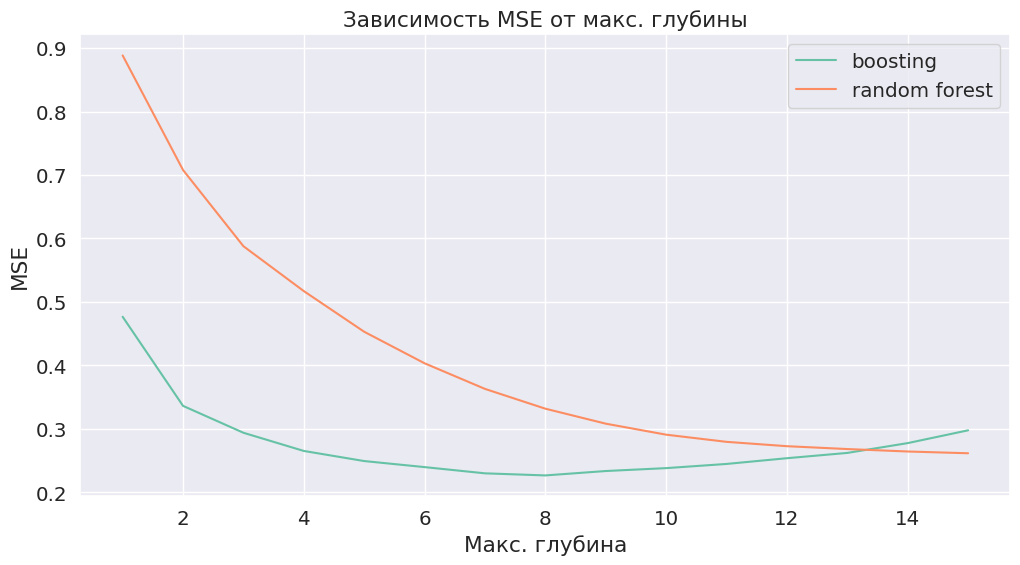

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(depth_grid, mse_values_boost, label='boosting')
plt.plot(depth_grid, mse_values_forest, label='random forest')

plt.xlabel('Макс. глубина')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от макс. глубины')
plt.show()

У случайного леса с увеличением глубины ошибка монотонно уменьшается. У градиентного бустинга же имеется точка (глубина 8), после которой ошибка начинает возрастать. По всей видимости, здесь проявляется переобучение.

In [12]:
boost.set_params(n_estimators=400, max_depth=None)
forest.set_params(n_estimators=400, max_depth=None)

boost.fit(X_train, y_train)
forest.fit(X_train, y_train)

mse_values_boost = [mse(y_test, y_pred) for y_pred in boost.staged_predict(X_test)]

y_pred_by_tree = np.array(
    [tree.predict(X_test) for tree in forest.estimators_]
)
n_grid = np.arange(1, 401)
forest_y_pred = np.cumsum(y_pred_by_tree, axis=0) \
                / n_grid[:, np.newaxis]
mse_values_forest = [mse(y_test, y_pred) for y_pred in forest_y_pred]

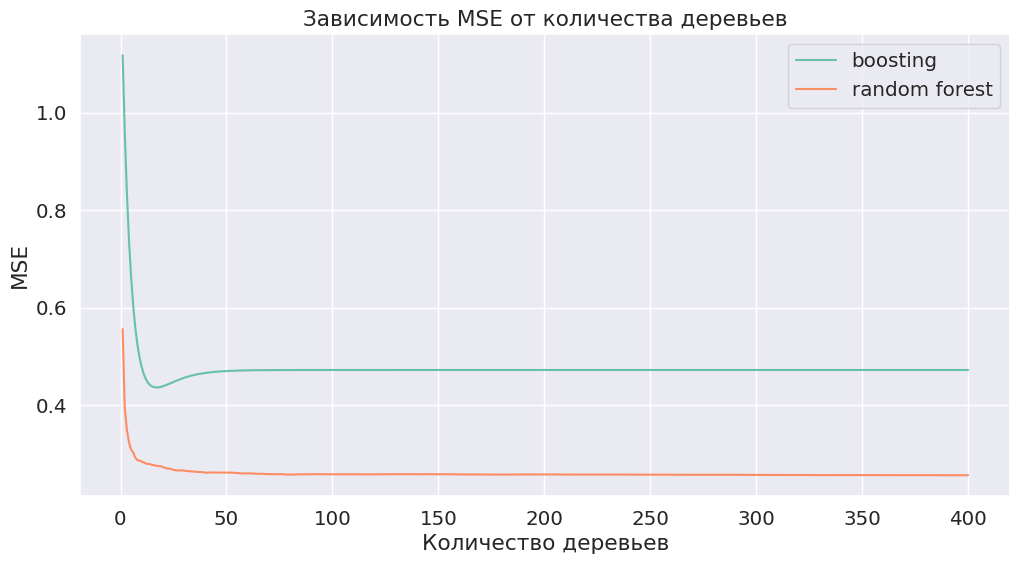

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(n_grid, mse_values_boost, label='boosting')
plt.plot(n_grid, mse_values_forest, label='random forest')

plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от количества деревьев')
plt.show()

Ситуация аналогична случаю для глубины - если ошибка случайного леса всё время убывает, то ошибка градиентного бустинга имеет минимум в области 20-30 деревьев.

In [122]:
mse_values_boost = []
mse_values_forest = []
lr_grid = np.linspace(0.0, 1.0, 20)
boost.set_params(n_estimators=100, max_depth=None)
forest.set_params(n_estimators=100, max_depth=None)
forest.fit(X_train, y_train)
for lr in lr_grid:
    boost.set_params(learning_rate=lr)
    boost.fit(X_train, y_train)
    mse_values_boost.append(mse(y_test, boost.predict(X_test)))
    mse_values_forest.append(mse(y_test, forest.predict(X_test)))

Смысл `learning_rate` - задать уровень доверия новой модели, что позволяет повысить точнось результата ценой увеличения количества итераций.

Для случайного леса `learning_rate` неприменим, поэтому выводим постоянный результат.

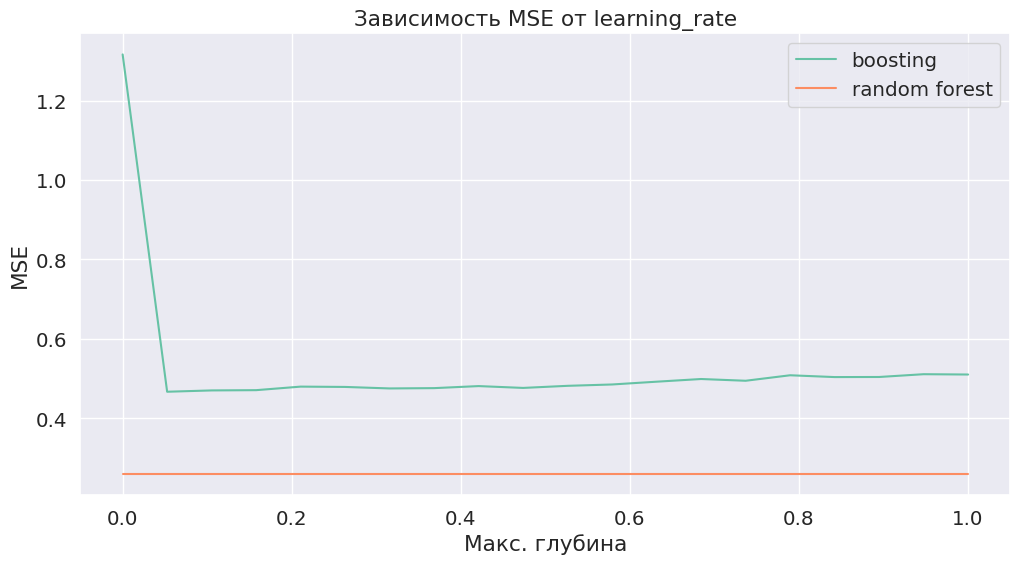

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(lr_grid, mse_values_boost, label='boosting')
plt.plot(lr_grid, mse_values_forest, label='random forest')

plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.legend()
plt.title('Зависимость MSE от learning_rate')
plt.show()

На параметрах по умолчанию бустинг не даёт улучшения по сравнению со случайным лесом вне зависимости от `learning_rate`. Можно заметить, что любой `learning_rate`, превосходящий 0.1, даёт примерно одинаковый вклад в ошибку.

2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.

In [21]:
boost.set_params(max_depth=None, n_estimators=100, learning_rate=0.0, random_state=None)
for _ in range(3):
    boost.fit(X_train, y_train)
    print(mse(y_test, boost.predict(X_test)))

1.31619327228342
1.31619327228342
1.31619327228342


В градиентном бустинге, в отличие от случайных лесов, нет элемента случайности, все необходимые параметры вычисляются детерминированно. Поэтому модель с одними и теми же гиперпараметрами после обучения на одних и тех же данных будет работать одинаково.

In [23]:
gridsearch = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions={
        'n_estimators': np.arange(1, 401),
        'max_depth': np.arange(1, 16),
        'learning_rate': np.linspace(0.05, 1.0, 99)
    },
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    n_iter=100,
    random_state=0
)
gridsearch.fit(X_train, y_train)

/home/shcnik42/.local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.05      , 0.05969388, 0.06938776, 0.07908163, 0.08877551,
       0.09846939, 0.10816327, 0.11785714, 0.12755102, 0.1372449 ,
       0.14693878, 0.15663265, 0.16632653, 0.17602041, 0.18571429,
       0.19540816, 0.20510204, 0.21479592, 0.2244898 , 0.23418...
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400])},
                   random_state=0, scoring='neg_mean_squared_error')

In [24]:
for param in gridsearch.best_params_:
    print(f'{param} = {gridsearch.best_params_[param]}')

n_estimators = 338
max_depth = 7
learning_rate = 0.07908163265306123


In [26]:
boost.set_params(**gridsearch.best_params_)

mse_features = []
features_grid = np.arange(1, X_train.shape[1] + 1)
for n_features in features_grid:
    boost.set_params(max_features=n_features)
    boost.fit(X_train, y_train)
    mse_features.append(mse(y_test, boost.predict(X_test)))

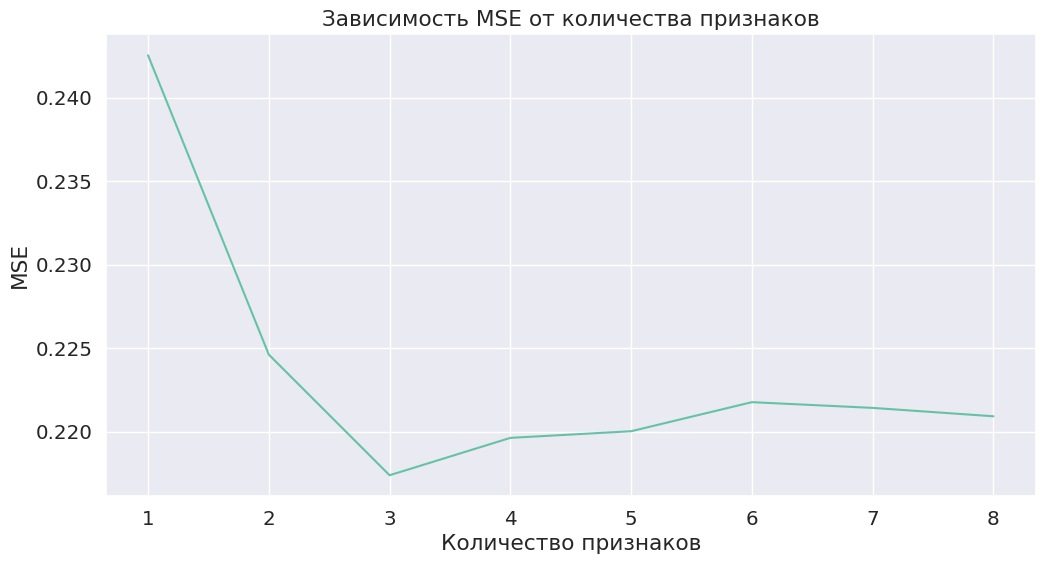

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(features_grid, mse_features)

plt.xlabel('Количество признаков')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков')
plt.show()

**2.**

Проведите сравнение случайного леса и градиентного бустинга с оптимальными гиперпараметрами, подобранными ранее, по производительности, в рамках которого выполните следующие действия.
* Замерьте время обучения данных моделей.
* Замерьте время построения предсказания для каждого объекта тестовой выборки. Постройте гистограмму, посчитайте среднее время и предсказательный интервал (возьмите выборочные квантили).
* Сравните фактическую глубину деревьев и количество листьев в композициях с помощью гистограмм. Посчитайте также среднее значение указанных характеристик. Используйте методы `get_depth()` и `get_n_leaves()` у решающего дерева.

In [71]:
gb = GradientBoostingRegressor(n_estimators=338, max_depth=7, learning_rate=0.08)
rf = RandomForestRegressor(n_estimators=226, max_depth=26)

for iteration in tqdm(range(3)):
    gb.fit(X_train, y_train)
for iteration in tqdm(range(3)):
    rf.fit(X_train, y_train)

100%|██████████| 3/3 [04:20<00:00, 86.75s/it]


По времени методы обучаются примерно одинаково.

In [73]:
from time import time

times_gb = []
times_rf = []

for obj in X_test:
    t0 = time()
    gb.predict(obj.reshape(1, -1))
    t1 = time()
    rf.predict(obj.reshape(1, -1))
    t2 = time()
    times_gb.append(t1 - t0)
    times_rf.append(t2 - t1)

In [76]:
time_mean_gb = np.mean(times_gb)
time_mean_rf = np.mean(times_rf)

a = 0.95

left_gb = np.quantile(times_gb, (1 - a) / 2)
right_gb = np.quantile(times_gb, (1 + a) / 2)
left_rf = np.quantile(times_rf, (1 - a) / 2)
right_rf = np.quantile(times_rf, (1 + a) / 2)

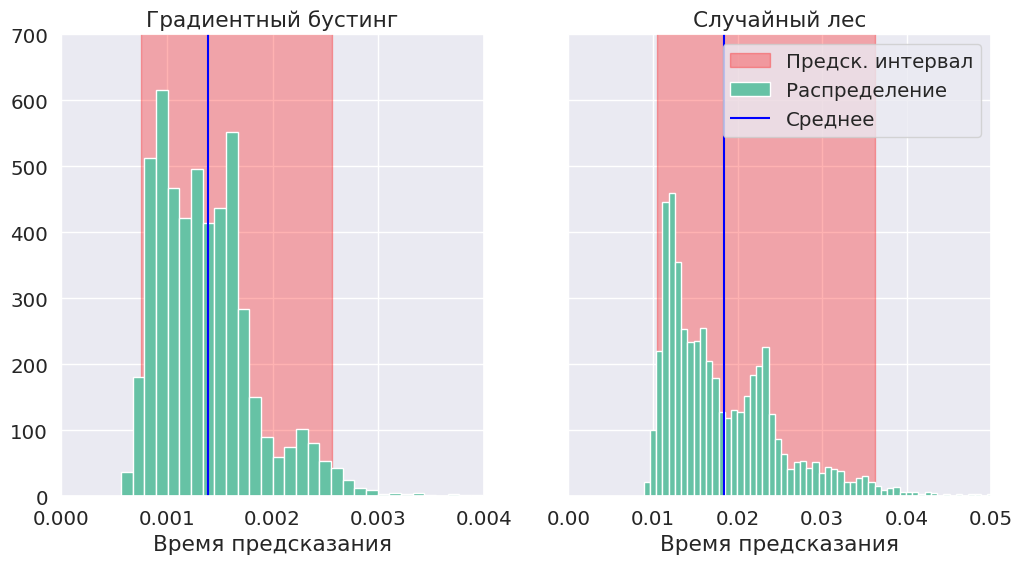

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax[0].fill_between([left_gb, right_gb], [0, 0], [1000, 1000], alpha=0.3, color='red', label='Предск. интервал')
ax[0].hist(times_gb, label='Распределение', bins=100)
ax[0].vlines(time_mean_gb, 0, 1000, color='blue', label='Среднее')
ax[0].set_xlabel('Время предсказания')
ax[0].set_xlim((0, 0.004))
ax[0].set_ylim((0, 700))
ax[0].set_title('Градиентный бустинг')

ax[1].fill_between([left_rf, right_rf], [0, 0], [1000, 1000], alpha=0.3, color='red', label='Предск. интервал')
ax[1].hist(times_rf, label='Распределение', bins=100)
ax[1].vlines(time_mean_rf, 0, 1000, color='blue', label='Среднее')
ax[1].set_xlabel('Время предсказания')
ax[1].set_xlim((0, 0.05))
ax[1].set_ylim((0, 700))
ax[1].set_title('Случайный лес')
ax[1].legend()

plt.show()

Как нетрудно видеть, случайный лес строит предсказание на порядок дольше градиентного бустинга.

In [92]:
depths_gb = [est[0].get_depth() for est in gb.estimators_]
depths_rf = [est.get_depth() for est in rf.estimators_]

leaves_gb = [est[0].get_n_leaves() for est in gb.estimators_]
leaves_rf = [est.get_n_leaves() for est in rf.estimators_]

In [93]:
mean_depths_gb = np.mean(depths_gb)
mean_depths_rf = np.mean(depths_rf)

mean_leaves_gb = np.mean(leaves_gb)
mean_leaves_rf = np.mean(leaves_rf)

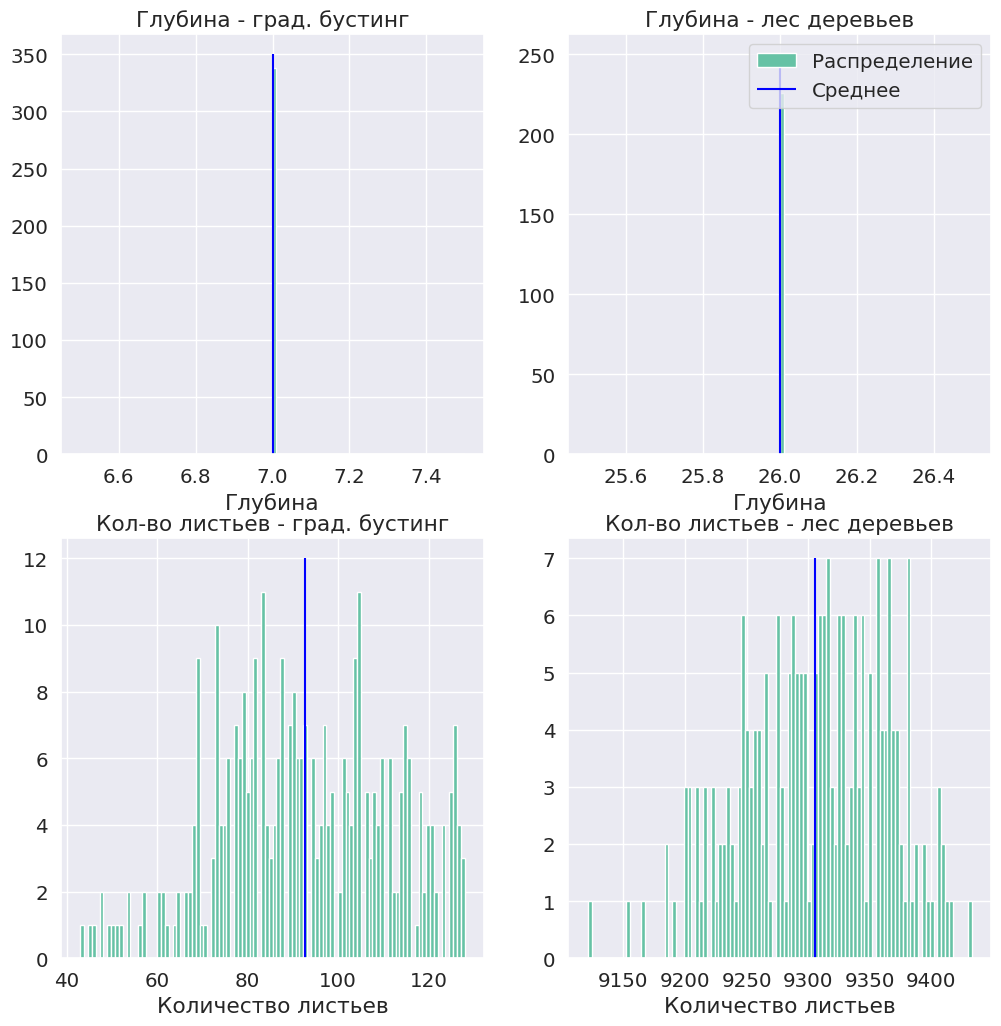

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].hist(depths_gb, label='Распределение', bins=100)
ax[0, 0].vlines(mean_depths_gb, 0, 350, color='blue', label='Среднее')
ax[0, 0].set_xlabel('Глубина')
ax[0, 0].set_title('Глубина - град. бустинг')

ax[0, 1].hist(depths_rf, label='Распределение', bins=100)
ax[0, 1].vlines(mean_depths_rf, 0, 250, color='blue', label='Среднее')
ax[0, 1].set_xlabel('Глубина')
ax[0, 1].set_title('Глубина - лес деревьев')

ax[1, 0].hist(leaves_gb, label='Распределение', bins=100)
ax[1, 0].vlines(mean_leaves_gb, 0, 12, color='blue', label='Среднее')
ax[1, 0].set_xlabel('Количество листьев')
ax[1, 0].set_title('Кол-во листьев - град. бустинг')

ax[1, 1].hist(leaves_rf, label='Распределение', bins=100)
ax[1, 1].vlines(mean_leaves_rf, 0, 7, color='blue', label='Среднее')
ax[1, 1].set_xlabel('Количество листьев')
ax[1, 1].set_title('Кол-во листьев - лес деревьев')

ax[0, 1].legend()
plt.show()

У обоих методов глубина почти всех деревьев одинакова и равна выбранному максимальному значению. Количество же листьев у деревьев сильно различается и почти у всех меньше максимального $2^\text{max\_depth}$

#### 3. 

Выберите самый значимый признак согласно `feature_importances_`. Визуализируйте работу бустинга, обученного только на одном этом признаке.

Для этого рассмотрите процесс построения бустинга для первых 10 итераций. При визуализации требуется для каждой итерации нарисовать:
* предсказания новой базовой модели и выборку, на которой эта базовая модель обучается;
* предсказания текущей композиции и исходную обучающую выборку. 

Пример графиков смотрите в лекции в разделе бустинг в задаче регресии.

In [99]:
print('Номер признака:', np.argmax(gb.feature_importances_))

Номер признака: 0


In [102]:
X_train_red = X_train[:, [np.argmax(gb.feature_importances_)]]
X_test_red = X_test[:, [np.argmax(gb.feature_importances_)]]

In [117]:
def boosting_predict(x, boosting_model):
    # Предсказание начальной моделью
    pred = boosting_model['init_estimator'].predict(x.reshape(-1, 1)).astype(float)
    for estimator in boosting_model['estimators_list']:
        # Предсказание очередной моделью, домноженное на шаг обучения
        pred += boosting_model['gamma'] * estimator.predict(x.reshape(-1, 1))

    return pred


def plot_decision_surface(
    boosting_model, X_train
):
    '''
    Функция для отображения разделяющей поверхности классификатора

    Параметры:
    1) estimator - классификатор;
    2) X_train, y_train - данные и разметка обучающей выборки;
    3) X_valid, y_valid - данные и разметка валидационной выборки;
    4) colors - цвета для отображения точек из разных классов;
    5) light_colors - цветовая схема для отображения разделяющей поверхности;
    6) title - заголовок графика.
    7) metric - метрика качества классификации.
    '''

    x1_values, x2_values = np.meshgrid(
        np.arange(X_train.min() - 0.5, X_train.max() + 0.5, 0.05),
        np.linspace(-0.05, 0.05, 2),
    )
    x1_ravel, x2_ravel = x1_values.ravel(), x2_values.ravel()
    mesh_predictions_ravel = boosting_predict(x1_ravel, boosting_model)
    mesh_predictions = np.array(mesh_predictions_ravel).reshape(x1_values.shape)

    plt.pcolormesh(x1_values, x2_values, mesh_predictions, cmap='autumn', alpha=0.2)
    plt.grid(False)

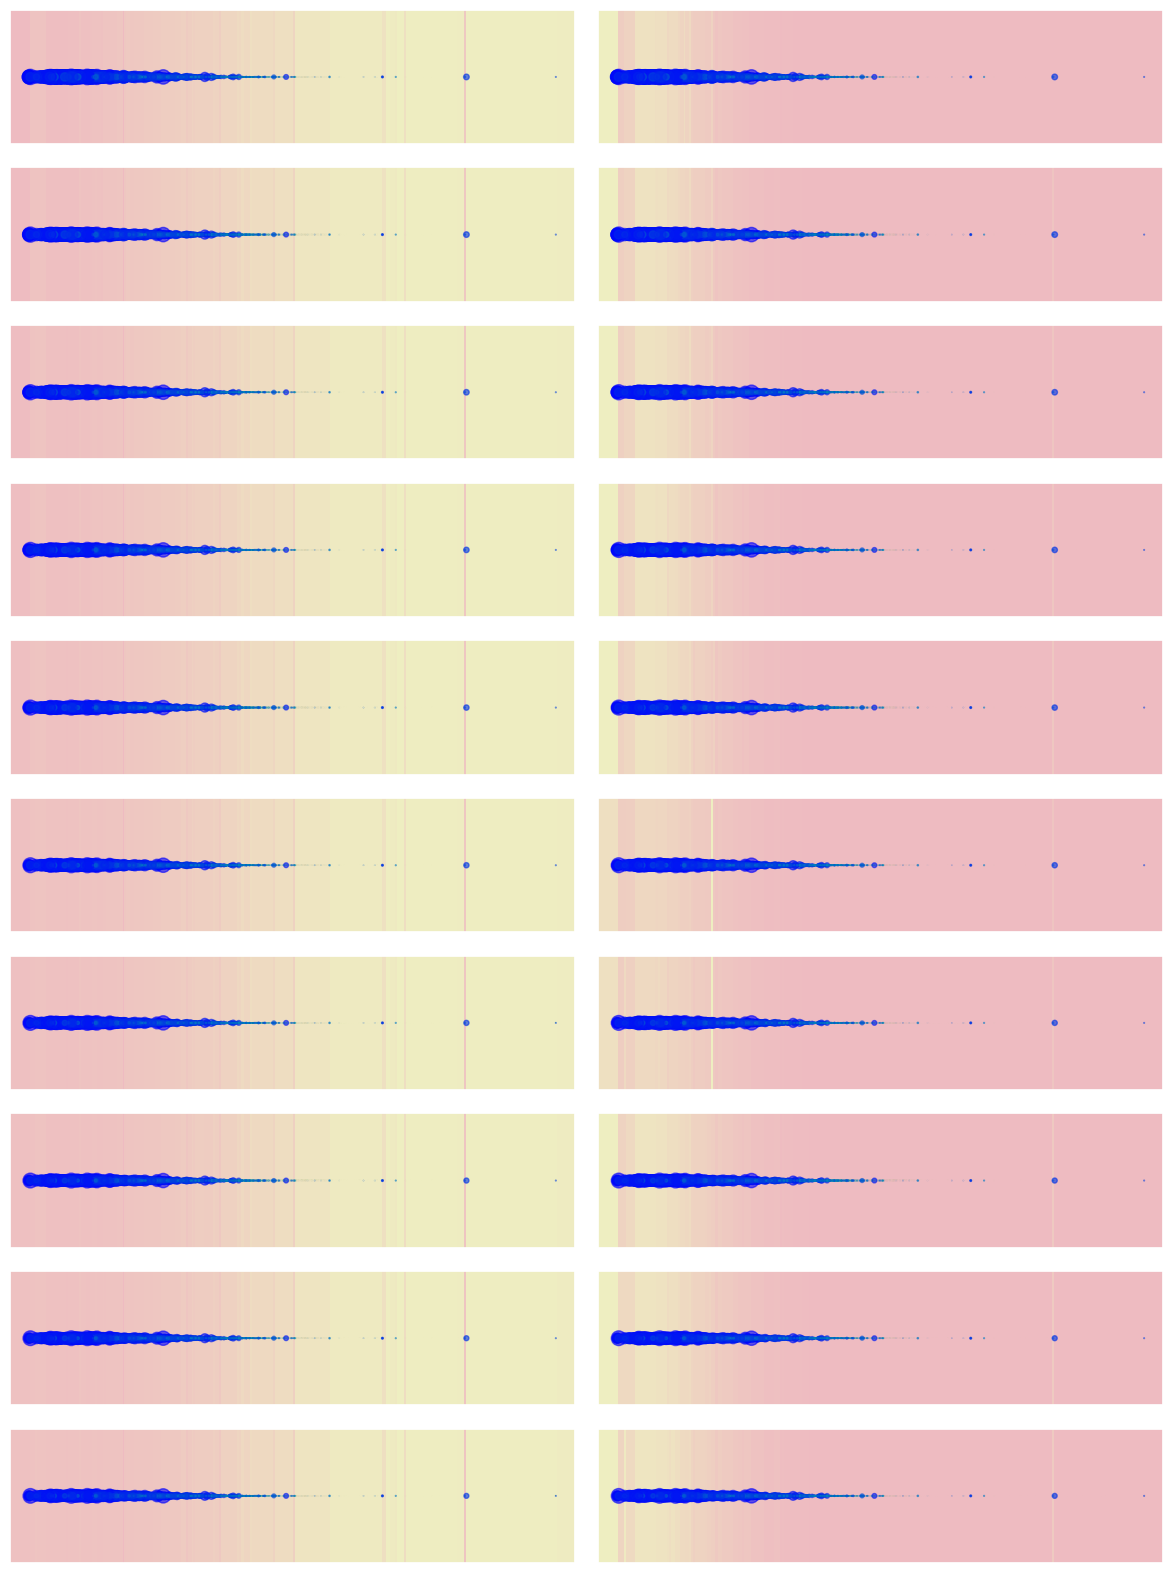

In [120]:
# Базовые модели бустинга и шаг обучения
boosting_model = {
    'gamma': 0.5,
    'init_estimator': DecisionTreeRegressor(max_depth=7).fit(X_train_red, y_train),
    'estimators_list': [],
}

# Веса объектов на каждой итерации
weights_trace = []
# Количество итераций обучения
n_iterations = 10

plt.figure(figsize=(12, 16))
for i in range(n_iterations):
    # Делаем предсказания уже существующей композицией
    y_pred = boosting_predict(X_train_red, boosting_model)
    # Веса объектов для новой итерации
    weights = np.exp(- y_train * y_pred)
    weights_trace.append(weights)
    # Вектор антиградиента
    anti_gradient = y_train * weights

    # Визуализируем текущую композицию и новые веса объектов
    plt.subplot(10, 2, 2*i+1)
    plot_decision_surface(boosting_model, X_train_red)
    plt.scatter(X_train_red[:, 0], [0] * X_train_red.shape[0], c=y_train, s=150*weights, cmap='winter', alpha=0.6)
    plt.xticks([]), plt.yticks([])

    # Обучаем новую модель 
    new_model = DecisionTreeRegressor(max_depth=7).fit(X_train_red, anti_gradient)
    empty_boosting_model = {
        'gamma': 0.5,
        'init_estimator': new_model,
        'estimators_list': [],
    }
    # Визуализируем предсказания новой модели
    plt.subplot(10, 2, 2*i+2)
    plot_decision_surface(empty_boosting_model, X_train_red)
    plt.scatter(X_train_red[:, 0], [0] * X_train_red.shape[0], c=y_train, s=150*weights, cmap='winter', alpha=0.6)
    plt.xticks([]), plt.yticks([])

    # Обучаем новую модель и добавляем ее к композиции
    boosting_model['estimators_list'] += [new_model]

plt.tight_layout()

Как получается выборка, на которой обучается новая базовая модель в данном случае и в общем случае? 

#### 4.

Параметр `init` у класса `GradientBoostingRegressor` задает модель, выполняющую начальные предсказания, с которых стартует построение ансамбля. Какая начальная модель используется по умолчанию?

`DummyEstimator`, который возвращает среднее значение целевой переменной.

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. Для этого в качестве параметра `init` передайте модель ридж-регрессии `Ridge`, которая должна быть инициализирована, но необучена. 

Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

*Замечания.* 

1. Для настройки `alpha` в `Ridge`-модели внутри `GradientBoostingRegressor` вам может помочь метод `get_params()` у бустинга.
2. Не забывайте, что у бустинга тоже есть параметр `alpha`, не перепутайте их.

In [32]:
gridsearch = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(init=Ridge()),
    param_distributions={
        'n_estimators': np.arange(1, 401),
        'max_depth': np.arange(1, 16),
        'learning_rate': np.linspace(0.05, 1.0, 99),
        'init__alpha': np.linspace(0.0, 1.0, 100),
    },
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    n_iter=500,
    random_state=0
)
gridsearch.fit(X_train, y_train)

/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96305e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.62595e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.97426e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.98143e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shcnik42/.local/lib/python3.10/site-pa

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(init=Ridge()),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'init__alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0....
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400])},
                   random_state=0, scoring='neg_mean_squared_error')

In [33]:
for param in gridsearch.best_params_:
    print(f'{param} = {gridsearch.best_params_[param]}')

n_estimators = 380
max_depth = 7
learning_rate = 0.11785714285714285
init__alpha = 0.42424242424242425


#### 5. 

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ с оптимальными гиперпараметрами, подобранными ранее, в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ &mdash; коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$ и выведите его. Удалось ли добиться улучшения качества на тестовой выборке?

In [63]:
gb = GradientBoostingRegressor(n_estimators=338, max_depth=7, learning_rate=0.08)
rf = RandomForestRegressor(n_estimators=226, max_depth=26)

scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for w in np.linspace(0.0, 1.0, 20):
    w_scores = []
    for train, test in kf.split(X_train, y_train):
        gb.fit(X_train[train], y_train[train])
        rf.fit(X_train[train], y_train[train])
        y_pred = w * gb.predict(X_train[test]) + (1 - w) * rf.predict(X_train[test])
        w_scores.append(mse(y_train[test], y_pred))
    scores.append(np.mean(w_scores))

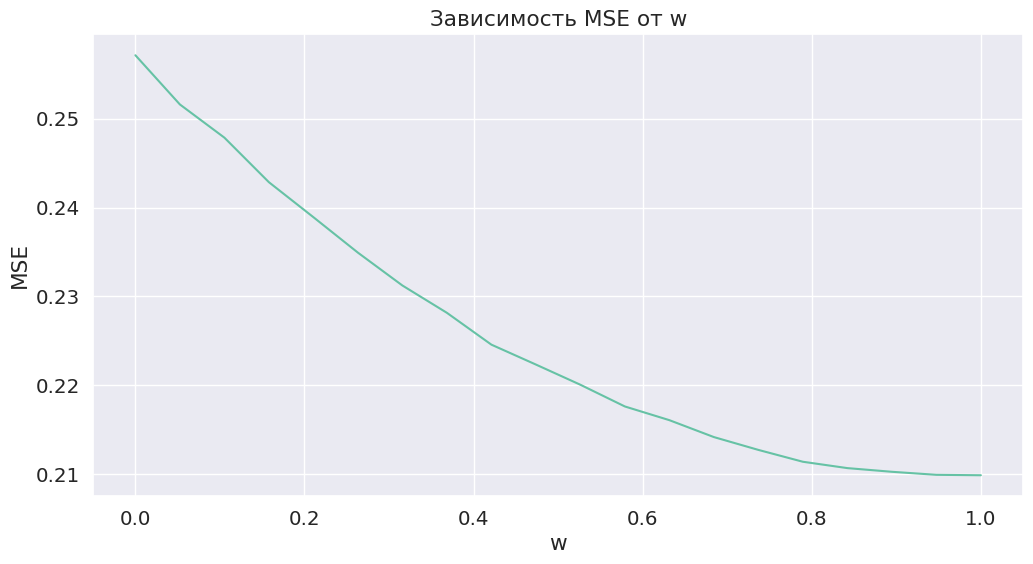

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0.0, 1.0, 20), scores)

plt.xlabel('w')
plt.ylabel('MSE')
plt.title('Зависимость MSE от w')
plt.show()

In [65]:
print('w =', np.linspace(0.0, 1.0, 20)[np.argmin(scores)])

w = 1.0


Улучшения качества не будет, что очевидно даже без проверки - наша модель выродилась, будучи тождественной одному лишь градиентному бустингу.

**6.**

Сделайте итоговые выводы.

Градиентный бустинг, работая за примерно то же время, что и случайный лес (и даже быстрее), обеспечивает намного лучшую точность предсказаний.